In [34]:
import pandas as pd
import numpy as np

# Задание 1

In [10]:
first_data = pd.read_csv('data.tsv', delimiter='\t', index_col='School')

## Data description

<ul>
    <li><b>School</b> - Contains the name of each school</li>
    <li><b>School_Type</b> - Coded 'LibArts' for liberal arts and 'Univ' for university</li>
    <li><b>SAT</b> - Median combined Math and Verbal SAT score of students</li>
    <li><b>Acceptance</b> - % of applicants accepted</li>
    <li><b>$/Student</b> - Money spent per student in dollars</li>
    <li><b>Top 10%</b> - % of students in the top 10% of their h.s. graduating class</li>
    <li><b>%PhD</b> - % of faculty at the institution that have PhD degrees</li>
    <li><b>Grad%</b> - % of students at institution who eventually graduate</li>
</ul>

In [16]:
first_data.head()

,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
School,,,,,,,
Amherst,Lib Arts,1315,22,26636,85,81,93
Swarthmore,Lib Arts,1310,24,27487,78,93,88
Williams,Lib Arts,1336,28,23772,86,90,93
Bowdoin,Lib Arts,1300,24,25703,78,95,90
Wellesley,Lib Arts,1250,49,27879,76,91,86


In [19]:
#Описательная статистика данных
first_data.describe(include='all')

,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Univ,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,NaN,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,NaN,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,NaN,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,NaN,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,NaN,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000


In [106]:
#Подсчёт мод для количественных признаков
from scipy.stats import mode
s = (first_data.dtypes != 'object')
num_cols = list(s[s].index)
mds = mode(first_data[num_cols])
mds = pd.Series(mds.mode[0], index=num_cols)

In [107]:
mds

SAT            1300
Acceptance       24
$/Student     17520
Top 10%          52
%PhD             98
Grad%            88
dtype: int64

In [74]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.style.use('seaborn-deep')

### Поиск и отсечение выбросов

Отсечение выбросов через z-преобразование, отсечение при |z|<3

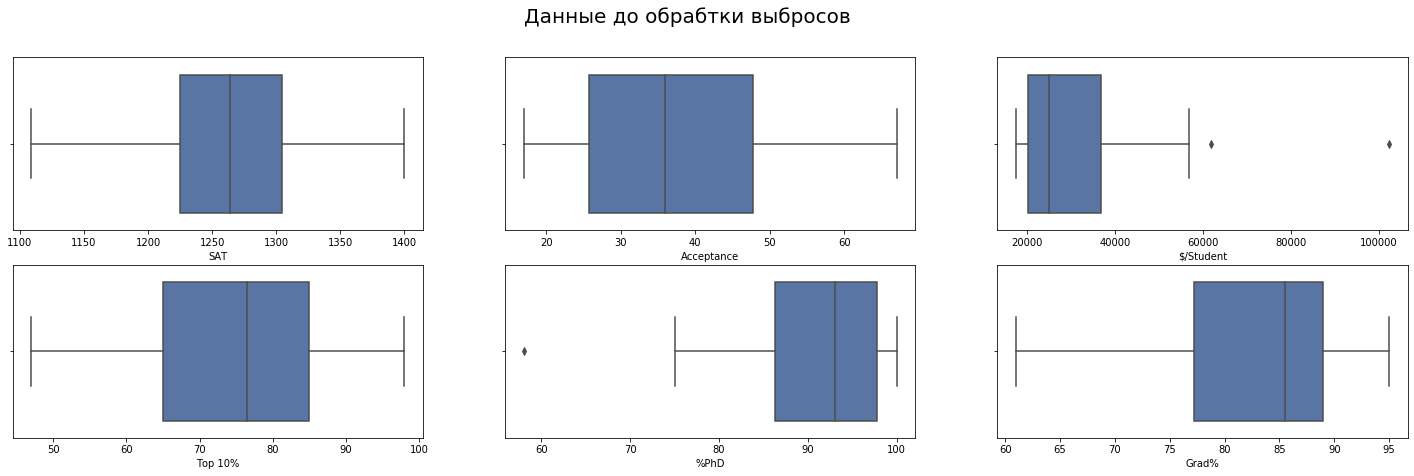

In [79]:
fig = plt.figure(figsize=(25,7))
fig.suptitle('Данные до обрабтки выбросов', fontsize=20)
for col in range(len(num_cols)):
    plt.subplot(2, 3, col + 1)
    sns.boxplot(first_data[num_cols[col]])

In [108]:
from scipy import stats
s = (first_data.dtypes != 'object')
num_cols = list(s[s].index)
# Поиск строк, где все признаки удовлетворяют условию |z| < 3
new_data = first_data[(np.abs(stats.zscore(first_data[num_cols])) < 3).all(axis=1)]

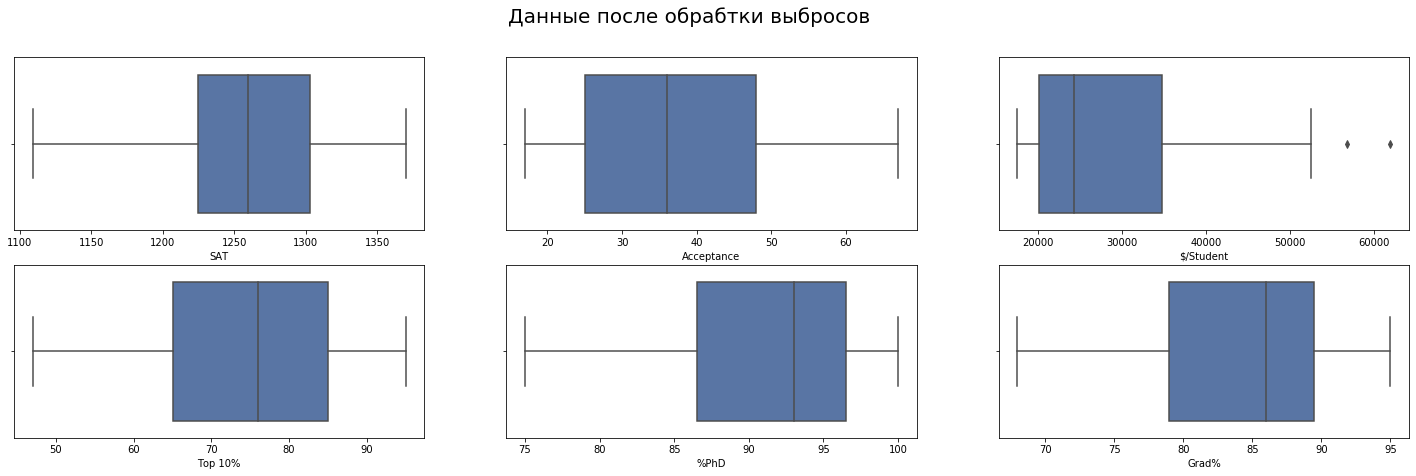

In [87]:
fig = plt.figure(figsize=(25,7))
fig.suptitle('Данные после обрабтки выбросов', fontsize=20)
for col in range(len(num_cols)):
    plt.subplot(2, 3, col + 1)
    sns.boxplot(new_data[num_cols[col]])

(array([15.,  5.,  7.,  6.,  1.,  1.,  2.,  4.,  0.,  2.,  1.,  1.,  0.,
         1.,  1.]),
 array([-0.98163791, -0.71611548, -0.45059305, -0.18507062,  0.08045182,
         0.34597425,  0.61149668,  0.87701911,  1.14254155,  1.40806398,
         1.67358641,  1.93910884,  2.20463128,  2.47015371,  2.73567614,
         3.00119857]),
 <a list of 15 Patch objects>)

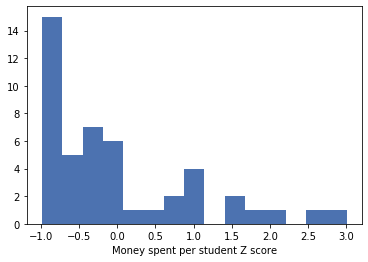

In [96]:
plt.xlabel('Money spent per student Z score')
plt.hist(stats.zscore(new_data['$/Student']), bins=15)

In [88]:
new_data.shape

(47, 7)

### Решение проблемы с пропусками

In [54]:
#Поиск столбцов, где хотя бы один элемент пропущен
cols_with_missing = [col for col in new_data.columns
                     if new_data[col].isnull().any()]

In [55]:
cols_with_missing

[]

In [56]:
new_data

,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
School,,,,,,,
Amherst,Lib Arts,1315,22,26636,85,81,93
Swarthmore,Lib Arts,1310,24,27487,78,93,88
Williams,Lib Arts,1336,28,23772,86,90,93
Bowdoin,Lib Arts,1300,24,25703,78,95,90
Wellesley,Lib Arts,1250,49,27879,76,91,86
Pomona,Lib Arts,1320,33,26668,79,98,80
Wesleyan (CT),Lib Arts,1290,35,19948,73,87,91
Middlebury,Lib Arts,1255,25,24718,65,89,92
Smith,Lib Arts,1195,57,25271,65,90,87


### В данном датасете отсутствуют пропуски в строках

### Взаимная корреляция

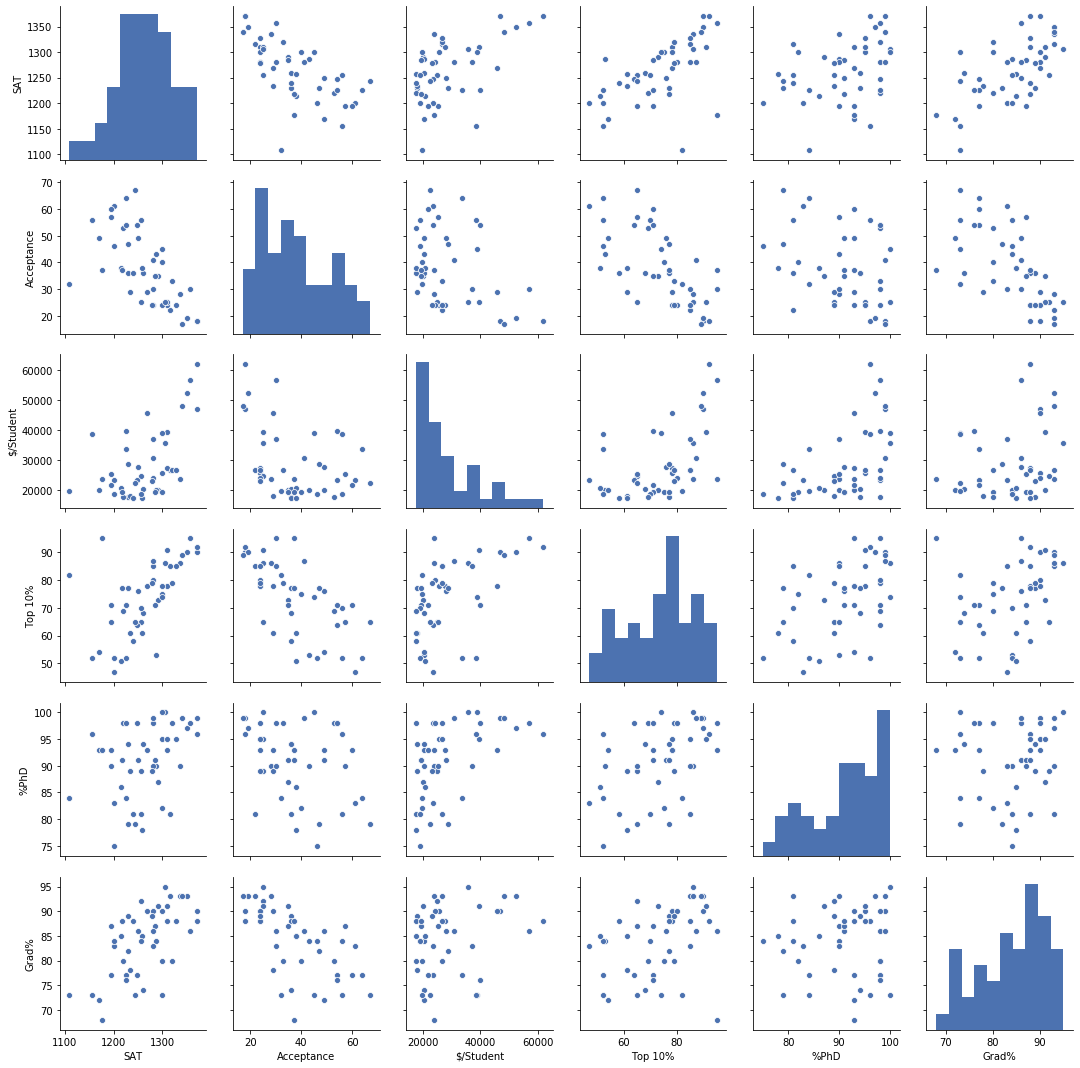

In [99]:
sns.pairplot(new_data)

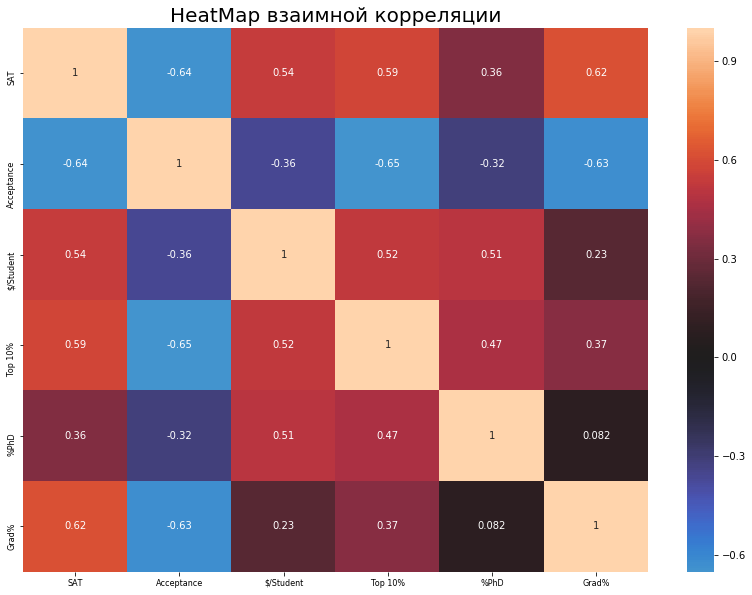

In [134]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(new_data.corr(), xticklabels=new_data.corr().columns, yticklabels=new_data.corr().columns, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('HeatMap взаимной корреляции', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

###### Задание 2

## Генерация генеральной совокупности

### Параметры и доли распределений

<ol>
    <li><b>μ</b> = 10 <b>σ</b> = 5 <b>Доля</b> 1/6 </li>
    <li><b>μ</b> = 4 <b>σ</b> = 2 <b>Доля</b> 1/2 </li>
    <li><b>μ</b> = 10 <b>σ</b> = 24 <b>Доля</b> 1/3 </li>
</ol>

In [169]:
mix = (stats.norm.rvs(size=1000, loc=10, scale=5)/6 + stats.norm.rvs(size=1000, loc=4, scale=2)/2 + stats.norm.rvs(size=1000, loc=6, scale=24)/3)

(array([ 2.,  1.,  4.,  5., 13., 12., 30., 36., 48., 52., 66., 70., 59.,
        86., 90., 97., 62., 57., 47., 44., 32., 24., 24., 15.,  8.,  3.,
         5.,  2.,  1.,  5.]),
 array([-17.96150157, -16.31660415, -14.67170674, -13.02680933,
        -11.38191191,  -9.7370145 ,  -8.09211708,  -6.44721967,
         -4.80232226,  -3.15742484,  -1.51252743,   0.13236998,
          1.7772674 ,   3.42216481,   5.06706222,   6.71195964,
          8.35685705,  10.00175446,  11.64665188,  13.29154929,
         14.93644671,  16.58134412,  18.22624153,  19.87113895,
         21.51603636,  23.16093377,  24.80583119,  26.4507286 ,
         28.09562601,  29.74052343,  31.38542084]),
 <a list of 30 Patch objects>)

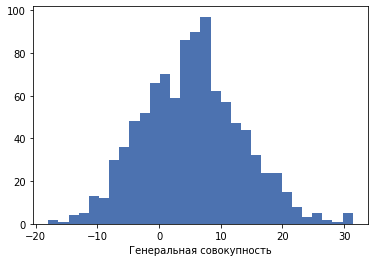

In [171]:
plt.xlabel('Генеральная совокупность')
plt.hist(mix, bins = 30)

# Задание 3

## Создание синтетических данных

(array([ 1.,  2.,  2., 16., 10., 13., 17., 25., 38., 46., 53., 69., 64.,
        80., 95., 88., 78., 70., 61., 52., 31., 32., 24.,  8., 10.,  4.,
         4.,  4.,  0.,  3.]),
 array([-1.04219976, -0.48503776,  0.07212423,  0.62928623,  1.18644823,
         1.74361023,  2.30077223,  2.85793422,  3.41509622,  3.97225822,
         4.52942022,  5.08658222,  5.64374421,  6.20090621,  6.75806821,
         7.31523021,  7.87239221,  8.4295542 ,  8.9867162 ,  9.5438782 ,
        10.1010402 , 10.6582022 , 11.21536419, 11.77252619, 12.32968819,
        12.88685019, 13.44401219, 14.00117418, 14.55833618, 15.11549818,
        15.67266018]),
 <a list of 30 Patch objects>)

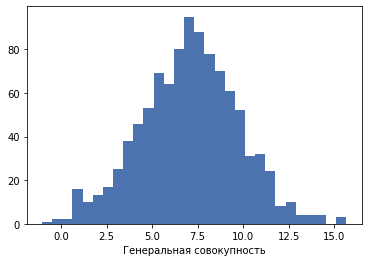

In [173]:
mix = (stats.norm.rvs(size=1000, loc=10, scale=5)/2 + stats.norm.rvs(size=1000, loc=4, scale=2)/2)
plt.xlabel('Генеральная совокупность')
plt.hist(mix, bins = 30)

# Задание 4

## Проверка гипотезы для коэффициента корреляции

In [177]:
brain = pd.read_csv('brain.tsv', delimiter='\t')
carprefs = pd.read_csv('carprefs.tsv', delimiter='\t')

In [189]:
brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


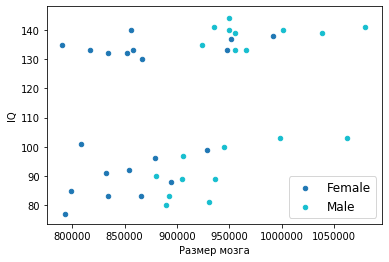

In [218]:
cat = np.unique(brain['Gender'])
colors = [plt.cm.tab10(i/float(len(cat)-1)) for i in range(len(cat))]
plt.figure()
for i, cat in enumerate(cat):
    plt.scatter('MRI_Count', 'FSIQ', data = brain.loc[brain.Gender==cat, :],
               s=20, c=colors[i], label=str(cat))
plt.xlabel('Размер мозга')
plt.ylabel('IQ')
plt.legend(fontsize=12)
plt.show()

In [201]:
def f1(x, y, a):
    x_m = np.mean(x)
    y_m = np.mean(y)
    r = sum((x-x_m)*(y-y_m))
    r /= sum((x-x_m) ** 2) ** 0.5
    r /= sum((y-y_m) ** 2) ** 0.5
    t = r/(1-r**2)**0.5 * (len(x)-2)**0.5
    t1 = stats.t.ppf(1 - a, len(x)-2)
    if abs(t) > abs(t1):
        return 'Отвергаем H0'
    else:
        return 'Не отвергаем H0'

### Выборка без разделения по полу

In [202]:
f1(brain['FSIQ'], brain['MRI_Count'], 0.95)

'Отвергаем H0'

In [203]:
men_brain = brain[brain['Gender']=='Male']
women_brain = brain[brain['Gender']=='Female']

### Выборка по мужскому полу

In [204]:
f1(men_brain['FSIQ'], men_brain['MRI_Count'], 0.95)

'Отвергаем H0'

### Выборка по женскому полу

In [205]:
f1(women_brain['FSIQ'], women_brain['MRI_Count'], 0.95)

'Не отвергаем H0'

## Критерий Хи-квадрат

In [219]:
carprefs.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


In [223]:
np.unique(carprefs.PreferCar)

array([1, 2, 3, 4], dtype=int64)

In [253]:
from scipy.stats import chi2_contingency
table = pd.crosstab(carprefs['Sex'], carprefs['PreferCar'])
stat, p, dof, expected = chi2_contingency(table)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


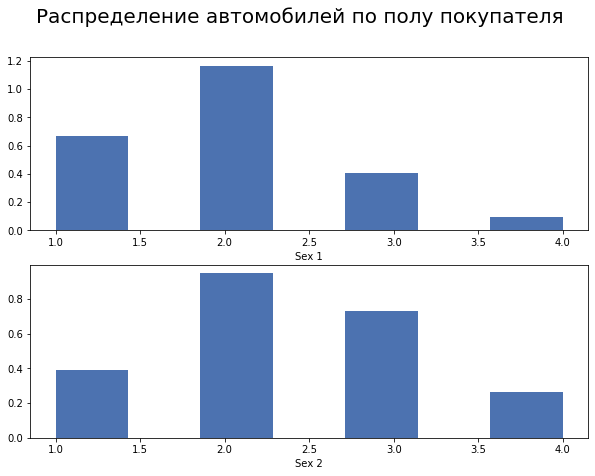

In [252]:
fig = plt.figure(figsize=(10,7))
fig.suptitle('Распределение автомобилей по полу покупателя', fontsize=20)
for i in range(1, 3):
    plt.subplot(2, 1, i)
    plt.hist(carprefs[carprefs['Sex']==i]['PreferCar'],bins=7, normed=1)
    plt.xlabel('Sex ' + str(i))
plt.show()

In [254]:
p

0.0005555699275518034

P уровень значимости < 0.05

H0 - не принимается, корреляции нет